In [ ]:
## Notebook env: mirtud_env (R kernel)
## evaluating proliferation effects of selected TuDs

In [ ]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(ggpubr)
library(rstatix)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
growth_rates = read.csv('/home/ssobti/projects/mir_tud/wetlab_followup_data/cellcycle/041024_prism_benedict_growth_rates.csv', header = F)
colnames(growth_rates) = growth_rates[1,]
growth_rates = growth_rates[-1,]
head(growth_rates)

growth_rates_plot_df = growth_rates %>% pivot_longer(cols = everything(), names_to = 'TuD', values_to = 'growth_rate')
growth_rates_plot_df$TuD = factor(growth_rates_plot_df$TuD, levels = colnames(growth_rates))
growth_rates_plot_df$growth_rate = as.numeric(growth_rates_plot_df$growth_rate)
#saveRDS(growth_rates_plot_df, '/home/ssobti/projects/mir_tud/fig_output/data/fig3/prism_benedict_growth_rates_plot_df.rds')
head(growth_rates_plot_df)

,Non-targeting control,tRNA-Cys-GCA-4-1.2t,tRNA-Gly-TCC-(6)2-1.2t,tRNA-Gln-TTG-(3)3-1.2t,tRNA-Arg-CCT-3-1.lh,tRNA-Arg-ACG-(3)1-1.2t
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,0.46903276,0.524292659,0.473616701,0.431248152,0.470333458,0.443711693
3,0.45678159,0.481020878,0.454963042,0.391122912,0.501914029,0.448467555
4,0.47561143,0.497917106,0.453130940,0.397321916,0.526039167,0.462116959
5,0.47917852,0.497016400,0.437806108,0.396394642,0.539060367,0.461998653
6,0.45372898,0.502247434,0.444719434,0.383937123,0.540231294,0.446743137
7,0.42913488,0.486323347,0.451349540,0.374782988,0.551298040,0.448398967


TuD,growth_rate
<fct>,<dbl>
Non-targeting control,0.4690328
tRNA-Cys-GCA-4-1.2t,0.5242927
tRNA-Gly-TCC-(6)2-1.2t,0.4736167
tRNA-Gln-TTG-(3)3-1.2t,0.4312482
tRNA-Arg-CCT-3-1.lh,0.4703335
tRNA-Arg-ACG-(3)1-1.2t,0.4437117


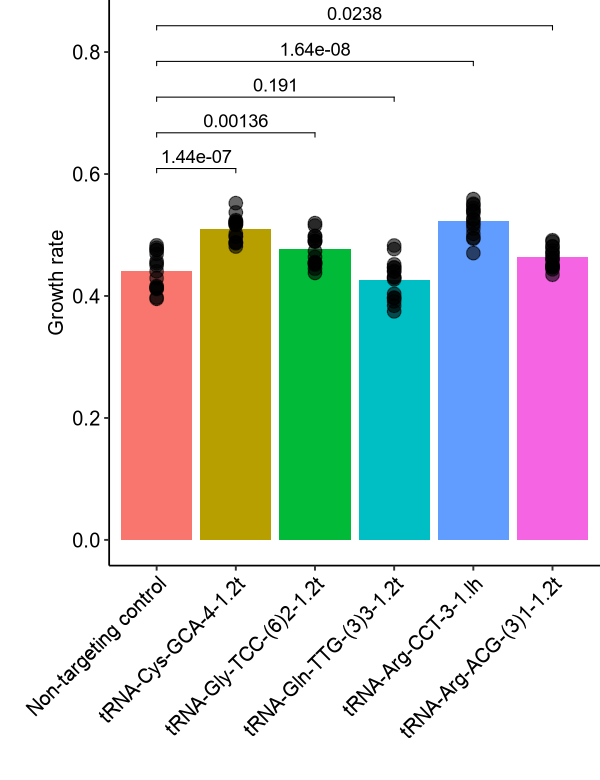

In [ ]:
stat.test = growth_rates_plot_df %>% t_test(growth_rate ~ TuD) %>% adjust_pvalue(method = "BH") %>% add_significance("p.adj") %>% filter(group1 == 'Non-targeting control') %>% add_y_position(step.increase = 0.00000001)
stat.test = as.data.frame(stat.test)
stat.test$y.position = stat.test$y.position + 0.05
stat.test$p.adj = signif(stat.test$p.adj, 3)

barplot = growth_rates_plot_df %>% ggplot(aes(TuD, growth_rate)) + stat_summary(aes(fill = TuD), fun.y = 'mean', show.legend = F, geom = 'bar') +
    geom_point(color = 'black', alpha = 0.6, size = 3.5, show.legend = FALSE) + theme_pubr() + stat_pvalue_manual(stat.test, label = 'p.adj', label.y = 0.58, step.increase = 0.25) +
    theme(plot.margin = unit(c(0, 0, 0, 0.4), 'in'), plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1)) + xlab('') + ylab('Growth rate')

options(repr.plot.width = 5, repr.plot.height = 6.5)
barplot